# Import library

In [1]:
# import library
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read station location data

In [2]:
station = pd.read_excel('./Air/AURN_monitor_network.xlsx')

In [ ]:
#station = station.loc[:,['UK-AIR ID','Site Name','Zone','Latitude','Longitude']]

In [ ]:
station

In [3]:
gdf = gpd.GeoDataFrame(station, geometry = gpd.points_from_xy(station.Easting, station.Northing))

In [7]:
#gdf.plot()

In [4]:
gdf = gdf.set_crs('epsg:27700')

In [5]:
gdf.crs 

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot:>

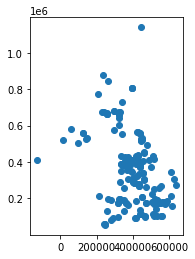

In [6]:
gdf.plot()

In [7]:
gdf

,UK-AIR ID,EU Site ID,EMEP Site ID,Site Name,Environment Type,Zone,Start Date,End Date,Latitude,Longitude,Northing,Easting,Altitude (m),Networks,AURN Pollutants Measured,Site Description,geometry
0,UKA00933,GB1375A,NaN,Aberdeen Erroll Park,Urban Background,North East Scotland,2021-10-01,NaN,57.157400,-2.094770,807396.47,394366.05,20.0,Automatic Urban and Rural Monitoring Network (...,NaN,NaN,POINT (394366.050 807396.470)
1,UKA00513,GB0923A,NaN,Aberdeen Union Street Roadside,Urban Traffic,North East Scotland,2008-01-01,NaN,57.144555,-2.106472,805967.60,393655.92,26.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a small self-...,POINT (393655.920 805967.600)
2,UKA00615,GB1057A,NaN,Aberdeen Wellington Road,Urban Traffic,North East Scotland,2016-02-09,NaN,57.133888,-2.094198,804779.00,394397.00,19.0,Automatic Urban and Rural Monitoring Network (...,NaN,This site is situated approximately 2m from th...,POINT (394397.000 804779.000)
3,UKA00541,GB0996A,NaN,Armagh Roadside,Urban Traffic,Northern Ireland,2009-01-01,NaN,54.353728,-6.654558,505347.21,97683.90,41.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (97683.900 505347.210)
4,UKA00137,GB0031R,GB0031R,Aston Hill,Rural Background,North Wales,1986-06-26,NaN,52.503850,-3.034178,290053.08,329898.90,370.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (329898.900 290053.080)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,UKA00628,GB1069A,NaN,Worthing A27 Roadside,Urban Traffic,Brighton/Worthing/Littlehampton,2016-10-01,NaN,50.832947,-0.379916,104962.96,514185.01,14.0,Automatic Urban and Rural Monitoring Network (...,NaN,"Roadside monitoring station beside A27, a busy...",POINT (514185.010 104962.960)
167,UKA00440,GB0755A,NaN,Wrexham,Urban Traffic,North Wales,2002-03-01,NaN,53.042282,-3.002829,349916.20,332861.75,70.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is housed within a self...,POINT (332861.750 349916.200)
168,UKA00168,GB0013R,GB0013R,Yarner Wood,Rural Background,South West,1987-06-26,NaN,50.597600,-3.716510,78948.50,278610.58,119.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (278610.580 78948.500)
169,UKA00523,GB0918A,NaN,York Bootham,Urban Background,Yorkshire & Humberside,2008-01-01,NaN,53.967513,-1.086514,452767.99,460023.83,15.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (460023.830 452767.990)


# Read monitor data

In [ ]:
#N = pd.read_csv('./Air/AirQualityData_NO.csv', skiprows=3)

In [8]:
NO = pd.read_excel('./Air/AirQualityData_NO.xlsx')

In [9]:
df = NO.mean(axis = 0, skipna = True)

/tmp/ipykernel_83/890031291.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = NO.mean(axis = 0, skipna = True)


In [10]:
NO2 = pd.DataFrame({'Station':df.index, 'NO':df.values})
NO2

,Station,NO
0,Aberdeen,20.148594
1,Aberdeen Erroll Park,35.945652
2,Aberdeen Union Street Roadside,58.201681
3,Aberdeen Wellington Road,66.468493
4,Armagh Roadside,54.202216
...,...,...
156,Worthing A27 Roadside,59.575000
157,Wrexham,24.886427
158,Yarner Wood,4.333333
159,York Bootham,16.099698


In [11]:
#Station = pd.merge(gdf, NO2, left_on='Site Name', right_on='Station', how='left')

In [12]:
Air_NO = pd.merge(NO2, gdf, left_on='Station', right_on='Site Name', how='left')

In [13]:
Air_NO.drop(0)

,Station,NO,UK-AIR ID,EU Site ID,EMEP Site ID,Site Name,Environment Type,Zone,Start Date,End Date,Latitude,Longitude,Northing,Easting,Altitude (m),Networks,AURN Pollutants Measured,Site Description,geometry
1,Aberdeen Erroll Park,35.945652,UKA00933,GB1375A,NaN,Aberdeen Erroll Park,Urban Background,North East Scotland,2021-10-01,NaN,57.157400,-2.094770,807396.47,394366.05,20.0,Automatic Urban and Rural Monitoring Network (...,NaN,NaN,POINT (394366.050 807396.470)
2,Aberdeen Union Street Roadside,58.201681,UKA00513,GB0923A,NaN,Aberdeen Union Street Roadside,Urban Traffic,North East Scotland,2008-01-01,NaN,57.144555,-2.106472,805967.60,393655.92,26.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a small self-...,POINT (393655.920 805967.600)
3,Aberdeen Wellington Road,66.468493,UKA00615,GB1057A,NaN,Aberdeen Wellington Road,Urban Traffic,North East Scotland,2016-02-09,NaN,57.133888,-2.094198,804779.00,394397.00,19.0,Automatic Urban and Rural Monitoring Network (...,NaN,This site is situated approximately 2m from th...,POINT (394397.000 804779.000)
4,Armagh Roadside,54.202216,UKA00541,GB0996A,NaN,Armagh Roadside,Urban Traffic,Northern Ireland,2009-01-01,NaN,54.353728,-6.654558,505347.21,97683.90,41.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (97683.900 505347.210)
5,Aston Hill,3.966154,UKA00137,GB0031R,GB0031R,Aston Hill,Rural Background,North Wales,1986-06-26,NaN,52.503850,-3.034178,290053.08,329898.90,370.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (329898.900 290053.080)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Worthing A27 Roadside,59.575000,UKA00628,GB1069A,NaN,Worthing A27 Roadside,Urban Traffic,Brighton/Worthing/Littlehampton,2016-10-01,NaN,50.832947,-0.379916,104962.96,514185.01,14.0,Automatic Urban and Rural Monitoring Network (...,NaN,"Roadside monitoring station beside A27, a busy...",POINT (514185.010 104962.960)
157,Wrexham,24.886427,UKA00440,GB0755A,NaN,Wrexham,Urban Traffic,North Wales,2002-03-01,NaN,53.042282,-3.002829,349916.20,332861.75,70.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is housed within a self...,POINT (332861.750 349916.200)
158,Yarner Wood,4.333333,UKA00168,GB0013R,GB0013R,Yarner Wood,Rural Background,South West,1987-06-26,NaN,50.597600,-3.716510,78948.50,278610.58,119.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (278610.580 78948.500)
159,York Bootham,16.099698,UKA00523,GB0918A,NaN,York Bootham,Urban Background,Yorkshire & Humberside,2008-01-01,NaN,53.967513,-1.086514,452767.99,460023.83,15.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (460023.830 452767.990)


In [14]:
Air_NO_geo = gpd.GeoDataFrame(Air_NO, crs="EPSG:27700", geometry=Air_NO['geometry'])

In [23]:
england_poly = pd.merge(england, polygon, left_on='LAD', right_on='LAD21CD', how='left')

In [24]:
england_poly_geo = gpd.GeoDataFrame(england_poly, crs="EPSG:27700", geometry=england_poly['geometry'])

In [25]:
pointInPoly = gpd.sjoin(Air_NO_geo, england_poly_geo, op='within') 

In [26]:
pointInPoly

,Station,NO,UK-AIR ID,EU Site ID,EMEP Site ID,Site Name,Environment Type,Zone,Start Date,End Date,...,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area
8,Barnsley Gawber,16.885093,UKA00353,GB0681A,NaN,Barnsley Gawber,Urban Background,Yorkshire & Humberside,1997-07-07,NaN,...,South Yorkshire (Met County),256.0,E08000016,Barnsley,429979.0,403327.0,-1.54925,53.525768,126421.141156,3.290776e+08
9,Bath A4 Roadside,56.099723,UKA00660,GB1101A,NaN,Bath A4 Roadside,Urban Traffic,South West,2019-10-24,NaN,...,Bath and North East Somerset,22.0,E06000022,Bath and North East Somerset,366217.0,161999.0,-2.48654,51.356041,141684.569708,3.511232e+08
12,Billingham,18.436813,UKA00153,GB0421A,NaN,Billingham,Urban Industrial,Teesside Urban Area,1987-01-01,NaN,...,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08
137,Stockton-on-Tees A1305 Roadside,24.136364,UKA00599,GB1041A,NaN,Stockton-on-Tees A1305 Roadside,Urban Traffic,Teesside Urban Area,2015-05-01,NaN,...,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08
138,Stockton-on-Tees Eaglescliffe,16.949721,UKA00535,GB0956A,NaN,Stockton-on-Tees Eaglescliffe,Urban Traffic,North East,2008-09-01,NaN,...,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Wigan Centre,24.506849,UKA00482,GB0864A,NaN,Wigan Centre,Urban Background,North West & Merseyside,2004-10-08,NaN,...,Greater Manchester (Met County),250.0,E08000010,Wigan,362136.0,402126.0,-2.57247,53.514450,88690.385814,1.881710e+08
156,Worthing A27 Roadside,59.575000,UKA00628,GB1069A,NaN,Worthing A27 Roadside,Urban Traffic,Brighton/Worthing/Littlehampton,2016-10-01,NaN,...,West Sussex,227.0,E07000229,Worthing,512679.0,104948.0,-0.40127,50.833099,29098.047654,3.378306e+07
158,Yarner Wood,4.333333,UKA00168,GB0013R,GB0013R,Yarner Wood,Rural Background,South West,1987-06-26,NaN,...,Devon,84.0,E07000045,Teignbridge,283144.0,80205.0,-3.65289,50.609810,161972.481356,6.800528e+08
159,York Bootham,16.099698,UKA00523,GB0918A,NaN,York Bootham,Urban Background,Yorkshire & Humberside,2008-01-01,NaN,...,York,14.0,E06000014,York,460864.0,452589.0,-1.07375,53.965820,99389.231218,2.720097e+08


In [27]:
NO_region = pointInPoly.groupby(['Region']).agg({'NO':'mean'}).reset_index()
cols = NO_region.columns.values
cols[0] = 'Region'
cols[1] = 'NO_region'
NO_region.columns = cols

In [28]:
NO_county = pointInPoly.groupby(['County_Code']).agg({'NO':'mean'}).reset_index()
cols = NO_county.columns.values
cols[0] = 'County_Code'
cols[1] = 'NO_county'
NO_county.columns = cols

In [29]:
NO_local = pointInPoly.groupby(['LAD21CD']).agg({'NO':'mean'}).reset_index()
cols = NO_local.columns.values
cols[0] = 'LAD21CD'
cols[1] = 'NO_local'
NO_local.columns = cols

In [30]:
gdf_local = pd.merge(england_poly_geo, NO_local, left_on='LAD21CD', right_on='LAD21CD', how='left')

In [31]:
gdf_county = pd.merge(gdf_local, NO_county, left_on='County_Code', right_on='County_Code', how='left')

In [32]:
gdf_region = pd.merge(gdf_county, NO_region, left_on='Region', right_on='Region', how='left')

In [33]:
gdf_region['NO_local'].fillna(gdf_region['NO_county'], inplace=True)

In [34]:
gdf_region['NO_local'].fillna(gdf_region['NO_region'], inplace=True)

In [35]:
gdf_region

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,NO_local,NO_county,NO_region
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",13.153203,13.153203,28.124875
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",17.755556,17.755556,28.124875
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",28.124875,NaN,28.124875
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",19.840966,19.840966,28.124875
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",28.124875,NaN,28.124875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42.712671,NaN,42.712671
346,E12000008,South East,England,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,30.157522,NaN,30.157522
347,E12000009,South West,England,South West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,26.555507,NaN,26.555507
348,E13000001,Inner London,England,London,E13000001,Inner London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,48.736184,48.736184,42.712671


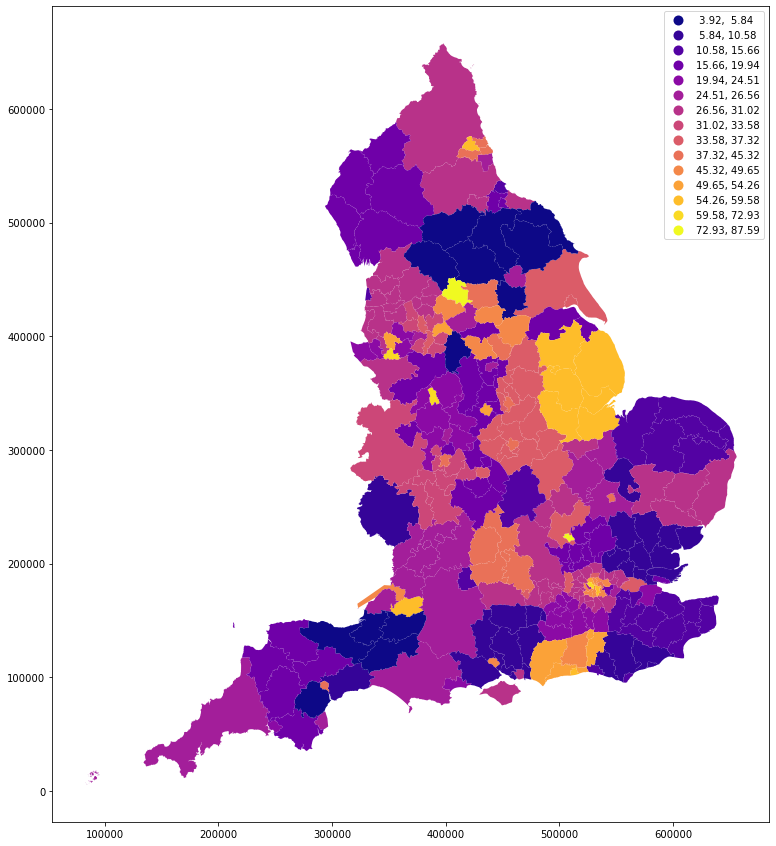

In [39]:
gdf_region.plot(column='NO_local', cmap='plasma', 
         scheme='FisherJenks', k=15, edgecolor='None', legend=True, figsize=(15,15));

# Read O3 data

In [40]:
O3 = pd.read_excel('./Air/AirQualityData_O3.xlsx')

In [41]:
df_O3 = O3.mean(axis = 0, skipna = True)

/tmp/ipykernel_83/1756433496.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_O3 = O3.mean(axis = 0, skipna = True)


In [42]:
O3 = pd.DataFrame({'Station':df_O3.index, 'O3':df_O3.values})
O3

,Station,O3
0,Aberdeen,53.238866
1,Aberdeen Erroll Park,44.010989
2,Aston Hill,65.480826
3,Auchencorth Moss,60.764368
4,Barnsley Gawber,49.312676
...,...,...
71,Weybourne,57.706849
72,Wicken Fen,52.272981
73,Wigan Centre,45.621547
74,Wirral Tranmere,52.869806


In [43]:
Air_O3 = pd.merge(O3, gdf, left_on='Station', right_on='Site Name', how='left')

In [44]:
Air_O3.drop(0)

,Station,O3,UK-AIR ID,EU Site ID,EMEP Site ID,Site Name,Environment Type,Zone,Start Date,End Date,Latitude,Longitude,Northing,Easting,Altitude (m),Networks,AURN Pollutants Measured,Site Description,geometry
1,Aberdeen Erroll Park,44.010989,UKA00933,GB1375A,NaN,Aberdeen Erroll Park,Urban Background,North East Scotland,2021-10-01,NaN,57.15740,-2.094770,807396.47,394366.05,20.0,Automatic Urban and Rural Monitoring Network (...,NaN,NaN,POINT (394366.050 807396.470)
2,Aston Hill,65.480826,UKA00137,GB0031R,GB0031R,Aston Hill,Rural Background,North Wales,1986-06-26,NaN,52.50385,-3.034178,290053.08,329898.90,370.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (329898.900 290053.080)
3,Auchencorth Moss,60.764368,UKA00451,GB0048R,GB0048R,Auchencorth Moss,Rural Background,Central Scotland,2003-01-01,NaN,55.79216,-3.242900,656128.11,322165.87,260.0,Automatic Hydrocarbon Network; Automatic Urban...,NaN,The monitoring station is within a self-contai...,POINT (322165.870 656128.110)
4,Barnsley Gawber,49.312676,UKA00353,GB0681A,NaN,Barnsley Gawber,Urban Background,Yorkshire & Humberside,1997-07-07,NaN,53.56292,-1.510436,407478.45,432524.22,100.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within an existing b...,POINT (432524.220 407478.450)
5,Belfast Centre,47.166205,UKA00212,GB0567A,NaN,Belfast Centre,Urban Background,Belfast Metropolitan Urban Area,1992-03-08,NaN,54.59965,-5.928833,529816.59,146337.91,10.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (146337.910 529816.590)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Weybourne,57.706849,UKA00433,GB0745A,GB0049R,Weybourne,Rural Background,Eastern,2001-05-30,NaN,52.95049,1.122017,343796.13,609834.35,16.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is housed within an exi...,POINT (609834.350 343796.130)
72,Wicken Fen,52.272981,UKA00362,GB0045R,GB0045R,Wicken Fen,Rural Background,Eastern,1997-10-15,NaN,52.29850,0.290917,269179.35,556315.59,5.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (556315.590 269179.350)
73,Wigan Centre,45.621547,UKA00482,GB0864A,NaN,Wigan Centre,Urban Background,North West & Merseyside,2004-10-08,NaN,53.54914,-2.638139,406023.56,357816.06,45.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is within a self-contai...,POINT (357816.060 406023.560)
74,Wirral Tranmere,52.869806,UKA00406,GB0730A,NaN,Wirral Tranmere,Urban Background,Birkenhead Urban Area,2000-05-14,NaN,53.37287,-3.022722,386710.96,332053.93,38.0,Automatic Urban and Rural Monitoring Network (...,NaN,The monitoring station is housed within a self...,POINT (332053.930 386710.960)


In [45]:
Air_O3_geo = gpd.GeoDataFrame(Air_O3, crs="EPSG:27700", geometry=Air_O3['geometry'])

# Read SO2 dada

In [46]:
SO2 = pd.read_excel('./Air/AirQualityData_SO2.xlsx')

In [47]:
df_SO2 = SO2.mean(axis = 0, skipna = True)

/tmp/ipykernel_83/1573791342.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_SO2 = SO2.mean(axis = 0, skipna = True)


In [48]:
SO2 = pd.DataFrame({'Station':df_SO2.index, 'SO2':df_SO2.values})
SO2

,Station,SO2
0,Ballymena Ballykeel,1.023669
1,Barnsley Gawber,1.160563
2,Belfast Centre,1.055882
3,Birmingham Ladywood,0.266667
4,Cardiff Centre,0.823529
5,Chilbolton Observatory,0.844444
6,Derry Rosemount,1.569405
7,Edinburgh St Leonards,0.957831
8,Grangemouth,2.048128
9,Hull Freetown,1.005797


In [49]:
Air_SO2 = pd.merge(SO2, gdf, left_on='Station', right_on='Site Name', how='left')

In [50]:
Air_SO2_geo = gpd.GeoDataFrame(Air_SO2, crs="EPSG:27700", geometry=Air_SO2['geometry'])

# Read LAD

In [51]:
polygon = gpd.read_file('./LAD/Local_Authority_Districts_(May_2021)_UK_BFE/LAD_MAY_2021_UK_BFE_V2.shp')

In [52]:
england = pd.read_excel('England_class.xlsx')
england

,LAD,LAD_Name,Country,Region,County_Code,County_Name
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees
4,E06000005,Darlington,England,North East,E06000005,Darlington
...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN
346,E12000008,South East,England,South East,NaN,NaN
347,E12000009,South West,England,South West,NaN,NaN
348,E13000001,Inner London,England,London,E13000001,Inner London


In [53]:
england_poly = pd.merge(england, polygon, left_on='LAD', right_on='LAD21CD', how='left')

In [54]:
england_poly_geo = gpd.GeoDataFrame(england_poly, crs="EPSG:27700", geometry=england_poly['geometry'])

# Merge NOx with LAD

In [55]:
pointInPoly = gpd.sjoin(Air_NO_geo, england_poly_geo, op='within') 
pointInPoly

,Station,NO,UK-AIR ID,EU Site ID,EMEP Site ID,Site Name,Environment Type,Zone,Start Date,End Date,...,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area
8,Barnsley Gawber,16.885093,UKA00353,GB0681A,NaN,Barnsley Gawber,Urban Background,Yorkshire & Humberside,1997-07-07,NaN,...,South Yorkshire (Met County),256.0,E08000016,Barnsley,429979.0,403327.0,-1.54925,53.525768,126421.141156,3.290776e+08
9,Bath A4 Roadside,56.099723,UKA00660,GB1101A,NaN,Bath A4 Roadside,Urban Traffic,South West,2019-10-24,NaN,...,Bath and North East Somerset,22.0,E06000022,Bath and North East Somerset,366217.0,161999.0,-2.48654,51.356041,141684.569708,3.511232e+08
12,Billingham,18.436813,UKA00153,GB0421A,NaN,Billingham,Urban Industrial,Teesside Urban Area,1987-01-01,NaN,...,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08
137,Stockton-on-Tees A1305 Roadside,24.136364,UKA00599,GB1041A,NaN,Stockton-on-Tees A1305 Roadside,Urban Traffic,Teesside Urban Area,2015-05-01,NaN,...,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08
138,Stockton-on-Tees Eaglescliffe,16.949721,UKA00535,GB0956A,NaN,Stockton-on-Tees Eaglescliffe,Urban Traffic,North East,2008-09-01,NaN,...,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Wigan Centre,24.506849,UKA00482,GB0864A,NaN,Wigan Centre,Urban Background,North West & Merseyside,2004-10-08,NaN,...,Greater Manchester (Met County),250.0,E08000010,Wigan,362136.0,402126.0,-2.57247,53.514450,88690.385814,1.881710e+08
156,Worthing A27 Roadside,59.575000,UKA00628,GB1069A,NaN,Worthing A27 Roadside,Urban Traffic,Brighton/Worthing/Littlehampton,2016-10-01,NaN,...,West Sussex,227.0,E07000229,Worthing,512679.0,104948.0,-0.40127,50.833099,29098.047654,3.378306e+07
158,Yarner Wood,4.333333,UKA00168,GB0013R,GB0013R,Yarner Wood,Rural Background,South West,1987-06-26,NaN,...,Devon,84.0,E07000045,Teignbridge,283144.0,80205.0,-3.65289,50.609810,161972.481356,6.800528e+08
159,York Bootham,16.099698,UKA00523,GB0918A,NaN,York Bootham,Urban Background,Yorkshire & Humberside,2008-01-01,NaN,...,York,14.0,E06000014,York,460864.0,452589.0,-1.07375,53.965820,99389.231218,2.720097e+08


In [56]:
NO_region = pointInPoly.groupby(['Region']).agg({'NO':'mean'}).reset_index()
cols = NO_region.columns.values
cols[0] = 'Region'
cols[1] = 'NO_region'
NO_region.columns = cols

In [57]:
NO_county = pointInPoly.groupby(['County_Code']).agg({'NO':'mean'}).reset_index()
cols = NO_county.columns.values
cols[0] = 'County_Code'
cols[1] = 'NO_county'
NO_county.columns = cols

In [58]:
NO_local = pointInPoly.groupby(['LAD21CD']).agg({'NO':'mean'}).reset_index()
cols = NO_local.columns.values
cols[0] = 'LAD21CD'
cols[1] = 'NO_local'
NO_local.columns = cols

In [59]:
gdf_NO_local = pd.merge(england_poly_geo, NO_local, left_on='LAD21CD', right_on='LAD21CD', how='left')

In [60]:
gdf_NO_county = pd.merge(gdf_NO_local, NO_county, left_on='County_Code', right_on='County_Code', how='left')

In [61]:
gdf_NO_region = pd.merge(gdf_NO_county, NO_region, left_on='Region', right_on='Region', how='left')

In [62]:
gdf_NO_region["NOx"] = np.nan

In [63]:
gdf_NO_region['NOx'].fillna(gdf_region['NO_local'], inplace=True)

In [64]:
gdf_NO_region['NOx'].fillna(gdf_region['NO_county'], inplace=True)

In [65]:
gdf_NO_region['NOx'].fillna(gdf_region['NO_region'], inplace=True)

In [66]:
gdf_NO_region

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,NO_local,NO_county,NO_region,NOx
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",13.153203,13.153203,28.124875,13.153203
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",17.755556,17.755556,28.124875,17.755556
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",NaN,NaN,28.124875,28.124875
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",19.840966,19.840966,28.124875,19.840966
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",NaN,NaN,28.124875,28.124875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,42.712671,42.712671
346,E12000008,South East,England,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,30.157522,30.157522
347,E12000009,South West,England,South West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,26.555507,26.555507
348,E13000001,Inner London,England,London,E13000001,Inner London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,48.736184,42.712671,48.736184


In [68]:
gdf_NO_region.to_csv(r'./OUTPUT/NOx_concentration.csv')

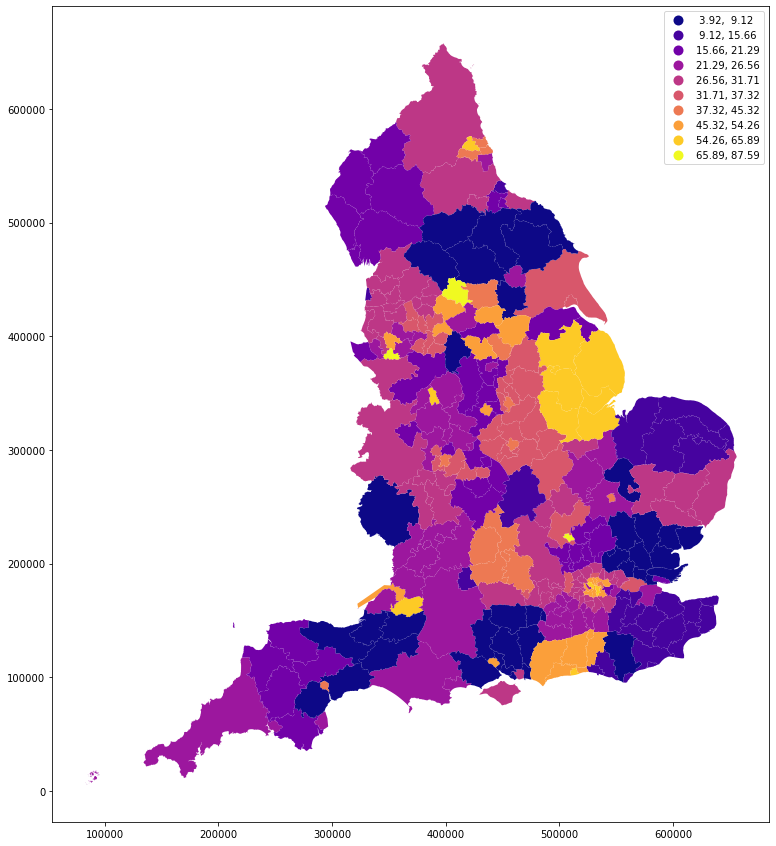

In [67]:
gdf_NO_region.plot(column='NOx', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(15,15));

# Merge O3 with LAD

In [69]:
pointInPoly = gpd.sjoin(Air_O3_geo, england_poly_geo, op='within') 
pointInPoly

,Station,O3,UK-AIR ID,EU Site ID,EMEP Site ID,Site Name,Environment Type,Zone,Start Date,End Date,...,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area
4,Barnsley Gawber,49.312676,UKA00353,GB0681A,NaN,Barnsley Gawber,Urban Background,Yorkshire & Humberside,1997-07-07,NaN,...,South Yorkshire (Met County),256.0,E08000016,Barnsley,429979.0,403327.0,-1.549250,53.525768,126421.141156,3.290776e+08
6,Birmingham A4540 Roadside,39.160563,UKA00626,GB1067A,NaN,Birmingham A4540 Roadside,Urban Traffic,West Midlands Urban Area,2016-09-06,NaN,...,West Midlands (Met County),264.0,E08000025,Birmingham,408150.0,287352.0,-1.881410,52.484039,106260.619498,2.677911e+08
7,Birmingham Acocks Green,51.188755,UKA00559,GB1013A,NaN,Birmingham Acocks Green,Urban Background,West Midlands Urban Area,2011-03-18,NaN,...,West Midlands (Met County),264.0,E08000025,Birmingham,408150.0,287352.0,-1.881410,52.484039,106260.619498,2.677911e+08
8,Birmingham Ladywood,51.364407,UKA00655,GB1097A,NaN,Birmingham Ladywood,Urban Background,West Midlands Urban Area,2018-06-01,NaN,...,West Midlands (Met County),264.0,E08000025,Birmingham,408150.0,287352.0,-1.881410,52.484039,106260.619498,2.677911e+08
9,Blackpool Marton,55.085873,UKA00488,GB0882A,NaN,Blackpool Marton,Urban Background,Blackpool Urban Area,2005-06-14,NaN,...,Blackpool,9.0,E06000009,Blackpool,332819.0,436635.0,-3.021990,53.821640,36304.962959,4.315077e+07
10,Bournemouth,56.825073,UKA00429,GB0741A,NaN,Bournemouth,Urban Background,Bournemouth Urban Area,2001-03-05,NaN,...,"Bournemouth, Christchurch and Poole [note 9]",55.0,E06000058,"Bournemouth, Christchurch and Poole",410815.0,94066.0,-1.848070,50.746090,90480.536327,1.739321e+08
11,Brighton Preston Park,49.144068,UKA00483,GB0860A,NaN,Brighton Preston Park,Urban Background,Brighton/Worthing/Littlehampton,2004-11-03,NaN,...,Brighton and Hove,41.0,E06000043,Brighton and Hove,530279.0,106850.0,-0.150790,50.846500,58181.148575,8.538589e+07
12,Bristol St Paul's,49.090395,UKA00494,GB0884A,NaN,Bristol St Paul's,Urban Background,Bristol Urban Area,2006-06-15,NaN,...,"Bristol, City of",23.0,E06000023,"Bristol, City of",359990.0,174846.0,-2.577420,51.471149,145510.066246,2.354419e+08
14,Canterbury,52.022161,UKA00424,GB0737A,NaN,Canterbury,Urban Background,South East,2001-01-02,NaN,...,Kent,128.0,E07000106,Canterbury,616032.0,158096.0,1.096342,51.281021,121123.042728,3.186045e+08
16,Charlton Mackrell,61.471976,UKA00537,GB0957A,GB0053R,Charlton Mackrell,Rural Background,South West,2008-09-03,NaN,...,Somerset,193.0,E07000189,South Somerset,345633.0,120798.0,-2.775880,50.983990,240610.347971,9.590581e+08


In [70]:
O3_region = pointInPoly.groupby(['Region']).agg({'O3':'mean'}).reset_index()
cols = O3_region.columns.values
cols[0] = 'Region'
cols[1] = 'O3_region'
O3_region.columns = cols
O3_region

,Region,O3_region
0,East Midlands,50.317241
1,East of England,51.627908
2,London,40.671127
3,North East,45.209872
4,North West,46.716235
5,South East,50.480026
6,South West,53.577382
7,West Midlands,48.787253
8,Yorkshire and The Humber,50.573113


In [71]:
O3_county = pointInPoly.groupby(['County_Code']).agg({'O3':'mean'}).reset_index()
cols = O3_county.columns.values
cols[0] = 'County_Code'
cols[1] = 'O3_county'
O3_county.columns = cols
O3_county

,County_Code,O3_county
0,E06000002,43.100000
1,E06000009,55.085873
2,E06000010,48.218837
3,E06000016,43.047486
4,E06000018,44.731302
5,E06000019,50.802198
6,E06000021,46.741667
7,E06000023,49.090395
8,E06000026,49.382682
9,E06000033,47.266854


In [72]:
O3_local = pointInPoly.groupby(['LAD21CD']).agg({'O3':'mean'}).reset_index()
cols = O3_local.columns.values
cols[0] = 'LAD21CD'
cols[1] = 'O3_local'
O3_local.columns = cols

In [73]:
gdf_O3_local = pd.merge(england_poly_geo, O3_local, left_on='LAD21CD', right_on='LAD21CD', how='left')

In [74]:
gdf_O3_county = pd.merge(gdf_O3_local, O3_county, left_on='County_Code', right_on='County_Code', how='left')

In [75]:
gdf_O3_region = pd.merge(gdf_O3_county, O3_region, left_on='Region', right_on='Region', how='left')

In [76]:
gdf_O3_region["O3"] = np.nan

In [77]:
gdf_O3_region['O3'].fillna(gdf_O3_region['O3_local'], inplace=True)

In [78]:
gdf_O3_region['O3'].fillna(gdf_O3_region['O3_county'], inplace=True)

In [79]:
gdf_O3_region['O3'].fillna(gdf_O3_region['O3_region'], inplace=True)

In [81]:
gdf_O3_region.to_csv(r'./OUTPUT/O3_concentration.csv')

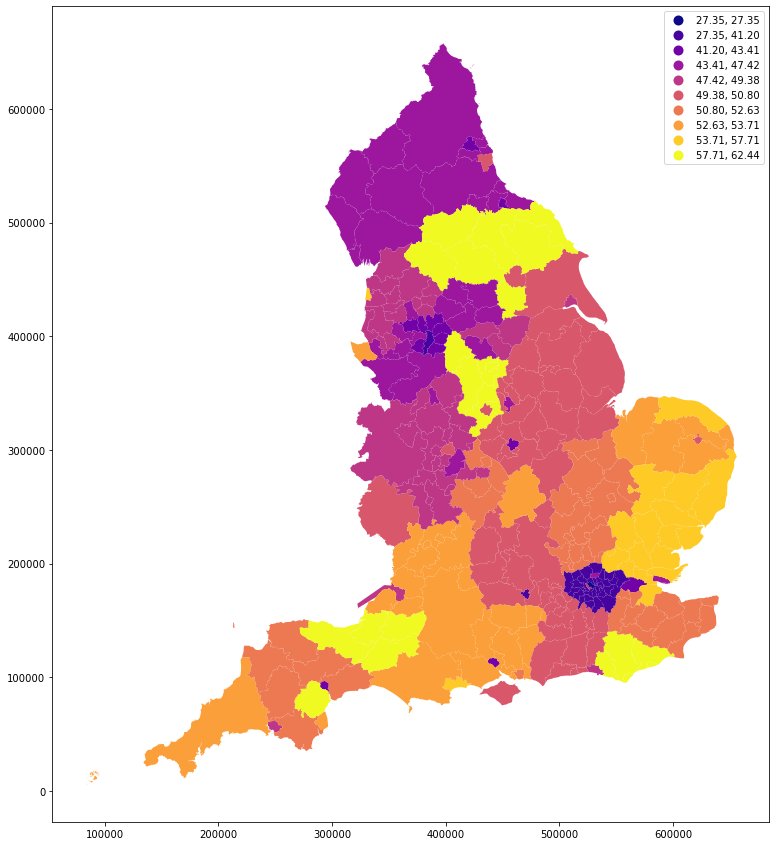

In [80]:
gdf_O3_region.plot(column='O3', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(15,15));

# Merge SO2 with LAD

In [137]:
pointInPoly = gpd.sjoin(Air_SO2_geo, england_poly_geo, op='within') 
pointInPoly

,Station,SO2,UK-AIR ID,EU Site ID,EMEP Site ID,Site Name,Environment Type,Zone,Start Date,End Date,...,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area
1,Barnsley Gawber,1.160563,UKA00353,GB0681A,NaN,Barnsley Gawber,Urban Background,Yorkshire & Humberside,1997-07-07,NaN,...,South Yorkshire (Met County),256.0,E08000016,Barnsley,429979.0,403327.0,-1.549250,53.525768,126421.141156,3.290776e+08
3,Birmingham Ladywood,0.266667,UKA00655,GB1097A,NaN,Birmingham Ladywood,Urban Background,West Midlands Urban Area,2018-06-01,NaN,...,West Midlands (Met County),264.0,E08000025,Birmingham,408150.0,287352.0,-1.881410,52.484039,106260.619498,2.677911e+08
5,Chilbolton Observatory,0.844444,UKA00614,GB1055R,GB1055R,Chilbolton Observatory,Rural Background,South East,2016-01-11,NaN,...,Hampshire,119.0,E07000093,Test Valley,434930.0,137329.0,-1.502140,51.134171,185842.676500,6.276218e+08
9,Hull Freetown,1.005797,UKA00450,GB0776A,NaN,Hull Freetown,Urban Background,Kingston upon Hull,2002-11-06,NaN,...,"Kingston upon Hull, City of",10.0,E06000010,"Kingston upon Hull, City of",511894.0,431650.0,-0.303820,53.769199,46016.382740,8.146886e+07
10,Ladybower,0.726644,UKA00171,GB0037R,GB0037R,Ladybower,Rural Background,East Midlands,1988-07-15,NaN,...,Derbyshire,76.0,E07000037,High Peak,410474.0,387660.0,-1.843980,53.385689,159632.653793,5.402540e+08
11,Leeds Centre,1.150000,UKA00222,GB0584A,NaN,Leeds Centre,Urban Background,West Yorkshire Urban Area,1993-01-04,NaN,...,West Yorkshire (Met County),274.0,E08000035,Leeds,432528.0,436384.0,-1.507360,53.822731,161521.735517,5.517065e+08
12,Liverpool Speke,2.628571,UKA00247,GB0777A,NaN,Liverpool Speke,Urban Industrial,Liverpool Urban Area,1995-11-24,NaN,...,Merseyside (Met County),252.0,E08000012,Liverpool,339361.0,390553.0,-2.913640,53.408298,67269.585504,1.335337e+08
13,London Bloomsbury,1.184564,UKA00211,GB0566A,NaN,London Bloomsbury,Urban Background,Greater London Urban Area,1992-01-23,NaN,...,Inner London,283.0,E09000007,Camden,527491.0,184283.0,-0.162910,51.543049,26245.739182,2.177858e+07
14,London Marylebone Road,2.134111,UKA00315,GB0682A,NaN,London Marylebone Road,Urban Traffic,Greater London Urban Area,1997-01-01,NaN,...,Inner London,309.0,E09000033,Westminster,528268.0,180871.0,-0.152950,51.512211,27258.578951,2.203779e+07
15,London N. Kensington,0.710843,UKA00253,GB0620A,NaN,London N. Kensington,Urban Background,Greater London Urban Area,1996-04-01,NaN,...,Inner London,296.0,E09000020,Kensington and Chelsea,525756.0,179058.0,-0.189770,51.496479,21101.244339,1.238404e+07


In [154]:
SO2_region = pointInPoly.groupby(['Region']).agg({'SO2':'mean'}).reset_index()
cols = SO2_region.columns.values
cols[0] = 'Region'
cols[1] = 'SO2_region'
SO2_region.columns = cols
SO2_region

,Region,SO2_region
0,East Midlands,0.896767
1,East of England,0.992739
2,London,1.343173
3,North East,1.170569
4,North West,1.831008
5,South East,0.941481
6,West Midlands,0.266667
7,Yorkshire and The Humber,1.204839


In [155]:
SO2_county = pointInPoly.groupby(['County_Code']).agg({'SO2':'mean'}).reset_index()
cols = SO2_county.columns.values
cols[0] = 'County_Code'
cols[1] = 'SO2_county'
SO2_county.columns = cols
SO2_county

,County_Code,SO2_county
0,E06000002,1.170569
1,E06000010,1.005797
2,E06000013,1.502994
3,E06000018,1.066890
4,E06000034,0.962751
5,E06000035,1.073333
6,E06000045,0.783282
7,E10000003,1.022727
8,E10000007,0.726644
9,E10000011,1.064865


In [156]:
SO2_local = pointInPoly.groupby(['LAD21CD']).agg({'SO2':'mean'}).reset_index()
cols = SO2_local.columns.values
cols[0] = 'LAD21CD'
cols[1] = 'SO2_local'
SO2_local.columns = cols
SO2_local

,LAD21CD,SO2_local
0,E06000002,1.170569
1,E06000010,1.005797
2,E06000013,1.502994
3,E06000018,1.066890
4,E06000034,0.962751
5,E06000035,1.073333
6,E06000045,0.783282
7,E07000009,1.022727
8,E07000037,0.726644
9,E07000065,1.064865


In [157]:
gdf_SO2_local = pd.merge(england_poly_geo, SO2_local, left_on='LAD21CD', right_on='LAD21CD', how='left')

In [158]:
gdf_SO2_county = pd.merge(gdf_SO2_local, SO2_county, left_on='County_Code', right_on='County_Code', how='left')

In [159]:
gdf_SO2_region = pd.merge(gdf_SO2_county, SO2_region, left_on='Region', right_on='Region', how='left')

In [160]:
gdf_SO2_region["SO2"] = np.nan

In [161]:
gdf_SO2_region['SO2'].fillna(gdf_SO2_region['SO2_local'], inplace=True)

In [162]:
gdf_SO2_region['SO2'].fillna(gdf_SO2_region['SO2_county'], inplace=True)

In [164]:
gdf_SO2_region['SO2'].fillna(gdf_SO2_region['SO2_region'], inplace=True)

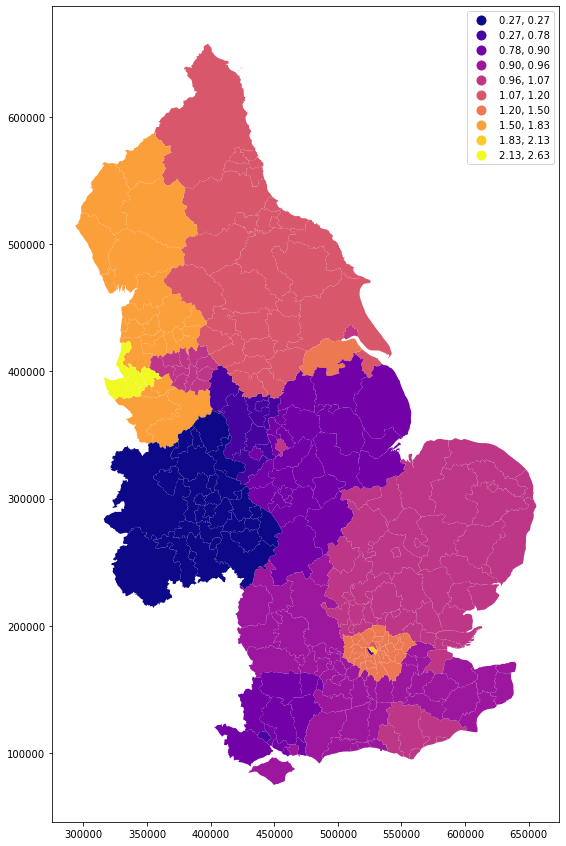

In [165]:
gdf_SO2_region.plot(column='SO2', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(15,15));